In [1]:
import pandas as pd # This is pandas library


In [2]:
df = pd.read_csv('C:\\Users\\biola\\Downloads\\loan_application_data.csv')


In [3]:
print(df.head())

                 emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE          90000   
1   warehouse office clerk        10.0    HI          RENT          40000   
2                 assembly         3.0    WI          RENT          40000   
3         customer service         1.0    PA          RENT          30000   
4     security supervisor         10.0    CA          RENT          35000   

   verified_income  debt_to_income  delinq_2y  earliest_credit_line  \
0         Verified            18.0          0                  2001   
1     Not Verified             5.0          0                  1996   
2  Source Verified            21.0          0                  2006   
3     Not Verified            10.0          0                  2007   
4         Verified            58.0          0                  2008   

   inquiries_last_12m  ...  installment  issue_month  loan_status  \
0                   6  ...          653  

In [4]:
print(df.describe())

        emp_length  annual_income  debt_to_income    delinq_2y  \
count  9183.000000   1.000000e+04     9976.000000  10000.00000   
mean      5.930306   7.922215e+04       19.311548      0.21600   
std       3.703734   6.473429e+04       15.011106      0.68366   
min       0.000000   0.000000e+00        0.000000      0.00000   
25%       2.000000   4.500000e+04       11.000000      0.00000   
50%       6.000000   6.500000e+04       18.000000      0.00000   
75%      10.000000   9.500000e+04       25.000000      0.00000   
max      10.000000   2.300000e+06      469.000000     13.00000   

       earliest_credit_line  inquiries_last_12m  total_credit_lines  \
count           10000.00000         10000.00000        10000.000000   
mean             2001.29000             1.95820           22.679600   
std                 7.79551             2.38013           11.885439   
min              1963.00000             0.00000            2.000000   
25%              1997.00000             0.00000   

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9415 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  int64  
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   delinq_2y                         10000 non-null  int64  
 8   earliest_credit_line              10000 non-null  int64  
 9   inquiries_last_12m                10000 non-null  int64  
 10  total_credit_lines                10000 non-null  int64  
 11  open_credit_lines                 10000 non-null  int64  
 12  total

In [6]:
print(df.isnull().sum())

emp_title                            585
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit

In [7]:
df['emp_title'] = df['emp_title'].fillna('Unknown')
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['debt_to_income'] = df['debt_to_income'].fillna(df['debt_to_income'].median())
df['months_since_last_credit_inquiry'] = df['months_since_last_credit_inquiry'].fillna(-1)
df['num_accounts_120d_past_due'] = df['num_accounts_120d_past_due'].fillna(0)
print(df.isnull().sum())



emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

In [8]:
df_sampled = df.sample(frac=0.5, random_state=42)


In [9]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Charged Off', 'Late (16-30 days)'], dtype=object)

In [10]:
def loan_class(status):
    if status in ['Current', 'Fully Paid']:
        return 1  
    else:
        return 0  

df_sampled['Loan_Class'] = df_sampled['loan_status'].apply(loan_class)


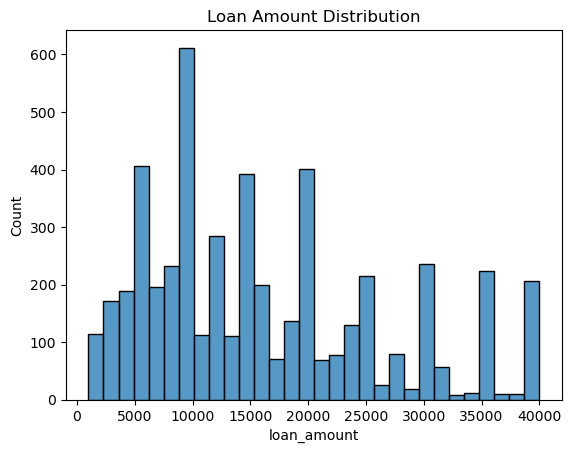

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df_sampled['loan_amount'], bins=30)
plt.title('Loan Amount Distribution')
plt.show()



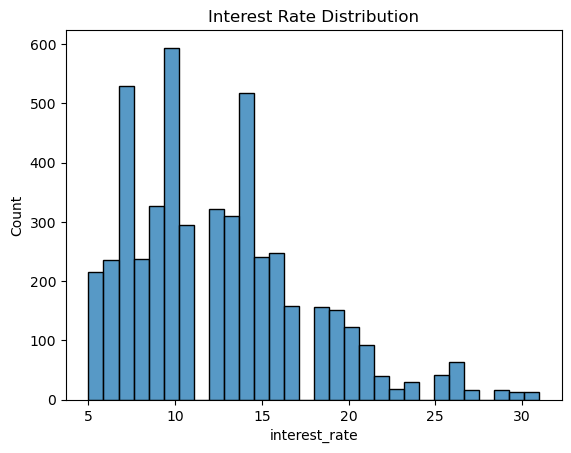

In [12]:
sns.histplot(df_sampled['interest_rate'], bins=30)
plt.title('Interest Rate Distribution')
plt.show()



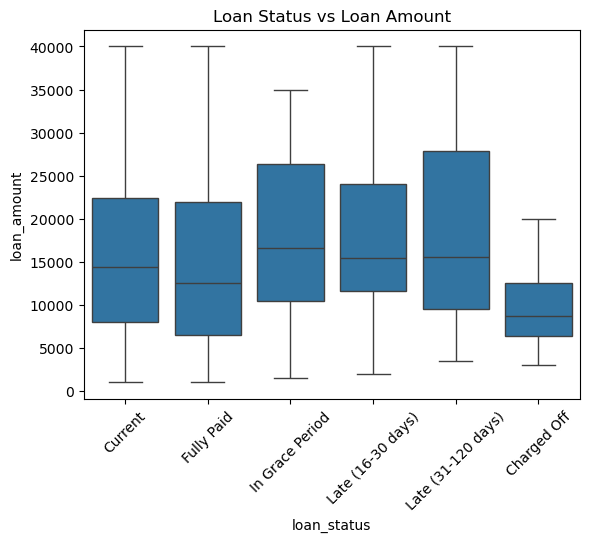

In [13]:
sns.boxplot(x='loan_status', y='loan_amount', data=df_sampled)
plt.title('Loan Status vs Loan Amount')
plt.xticks(rotation=45)
plt.show()



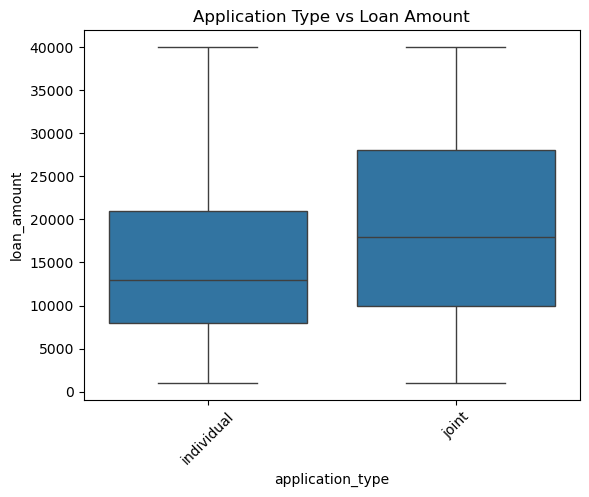

In [14]:
sns.boxplot(x='application_type', y='loan_amount', data=df_sampled)
plt.title('Application Type vs Loan Amount')
plt.xticks(rotation=45)
plt.show()



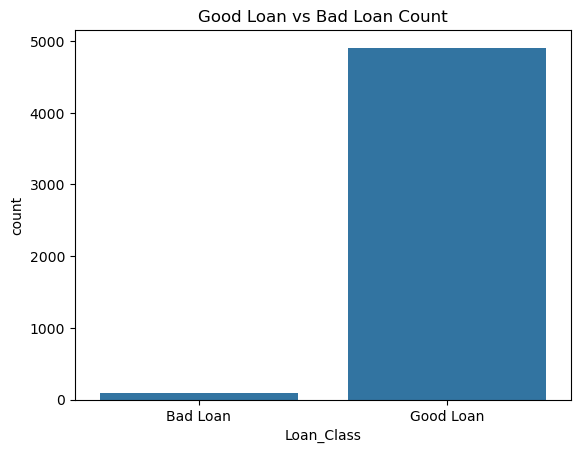

In [15]:
sns.countplot(x='Loan_Class', data=df_sampled)
plt.title('Good Loan vs Bad Loan Count')
plt.xticks([0, 1], ['Bad Loan', 'Good Loan'])
plt.show()

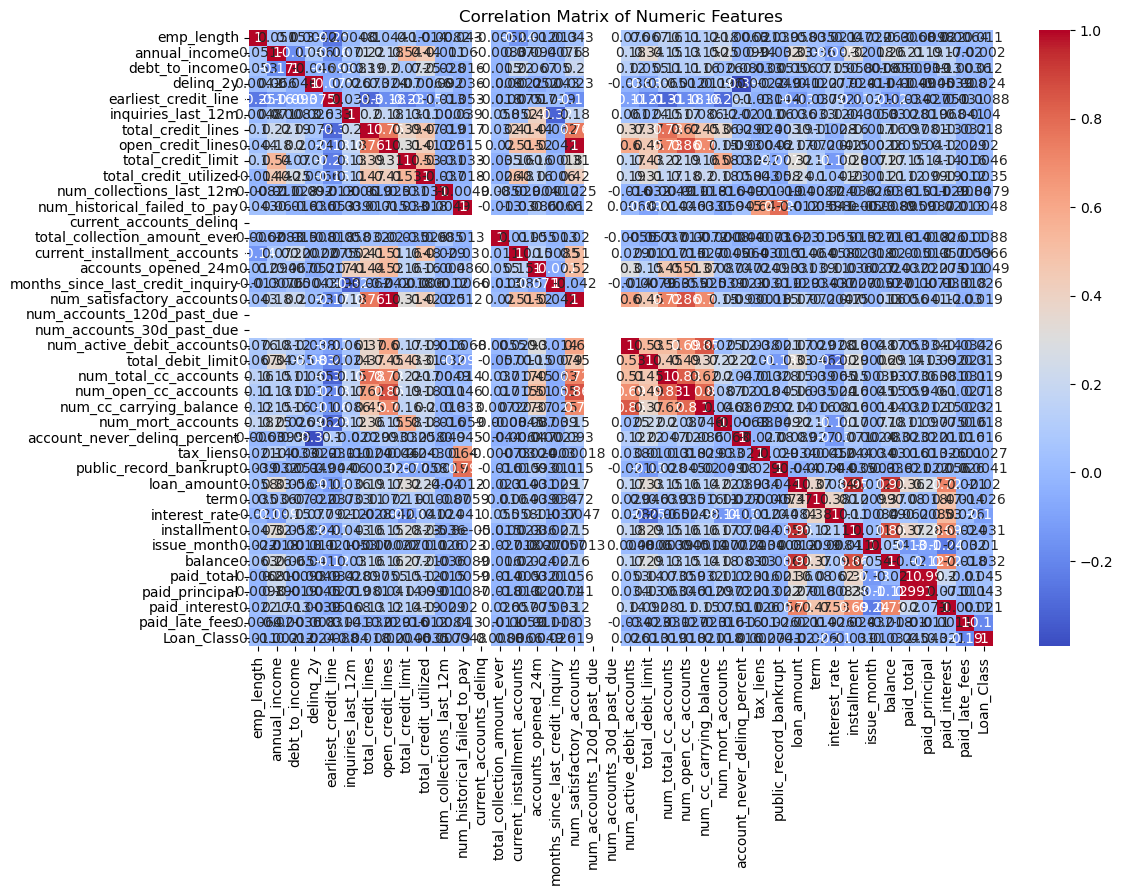

In [16]:
df_numeric = df_sampled.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()



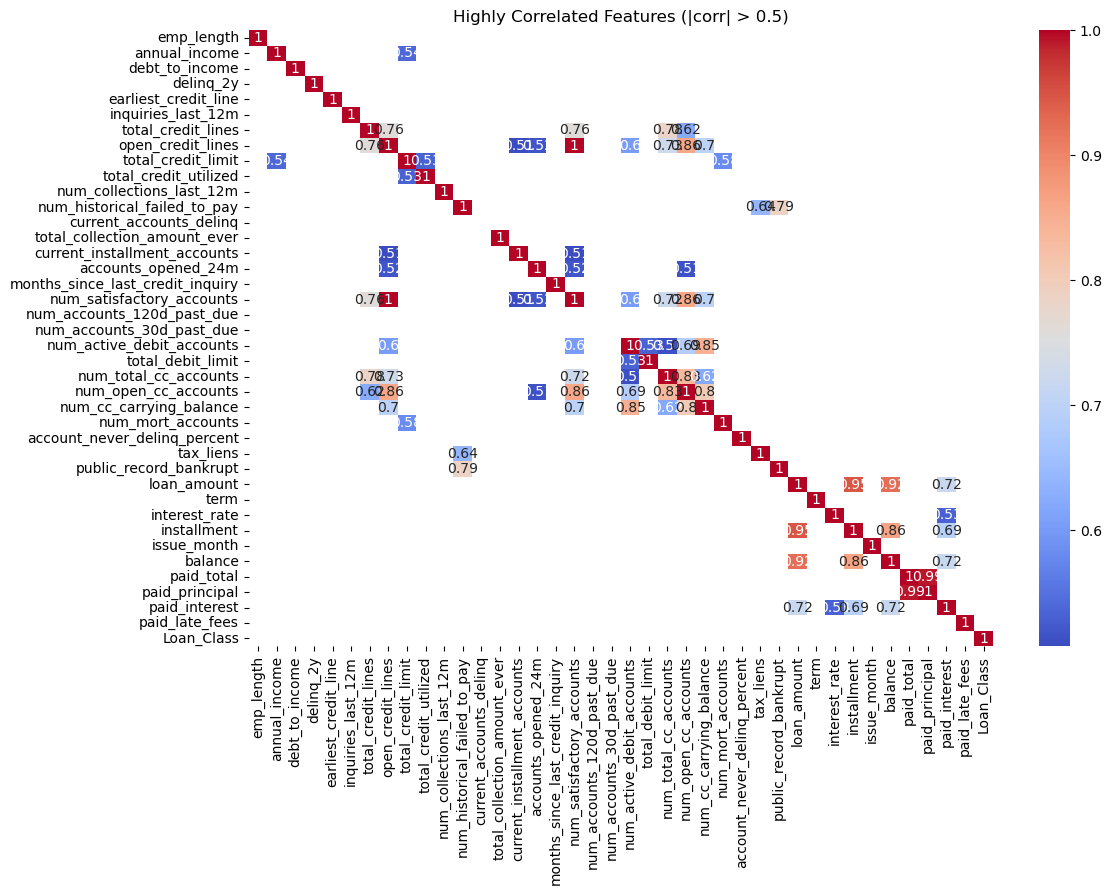

In [17]:
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', mask=high_corr.isnull())
plt.title('Highly Correlated Features (|corr| > 0.5)')
plt.show()


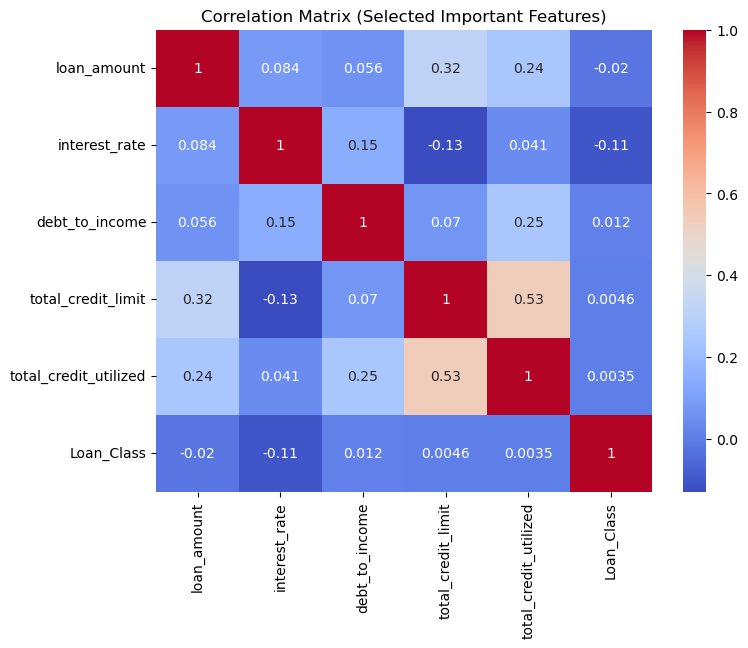

In [18]:
important_features = ['loan_amount', 'interest_rate', 'debt_to_income', 
                      'total_credit_limit', 'total_credit_utilized', 'Loan_Class']

corr_subset = df_numeric[important_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Selected Important Features)')
plt.show()


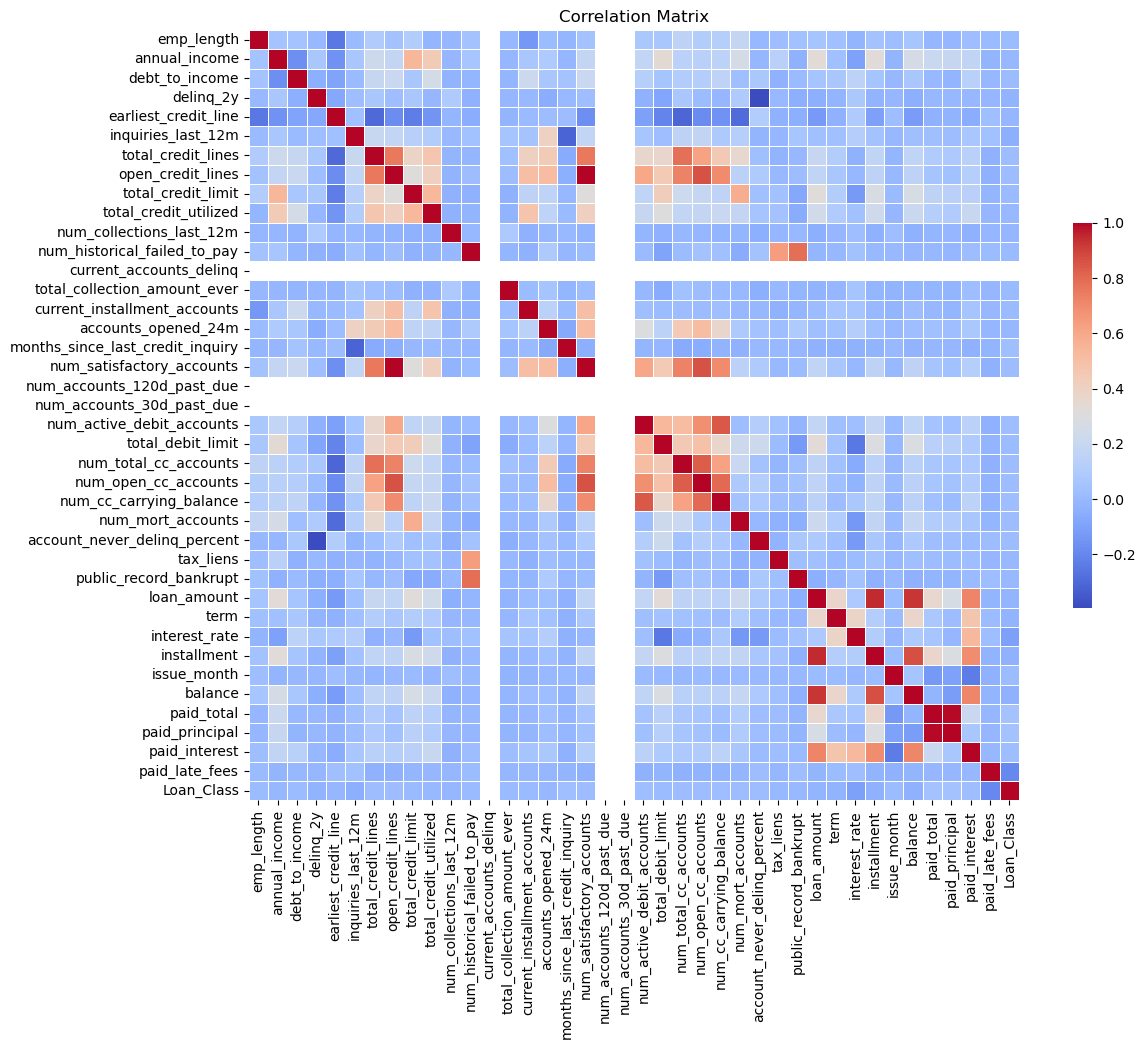

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['emp_title', 'state', 'loan_status', 'loan_purpose', 
              'application_type', 'homeownership', 'verified_income', 
              'initial_listing_status', 'disbursement_method']

le = LabelEncoder()

for col in label_cols:
    df_sampled[col] = le.fit_transform(df_sampled[col])


In [21]:
from sklearn.model_selection import train_test_split

X = df_sampled.drop(columns=['Loan_Class'])
y = df_sampled['Loan_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [24]:
y_pred = log_model.predict(X_test_scaled)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 18   0]
 [  0 982]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       982

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



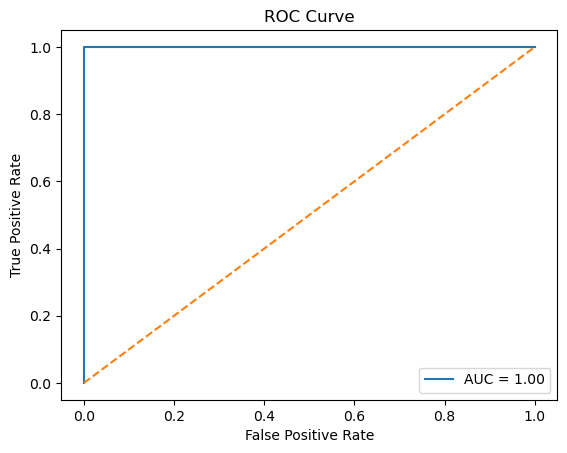

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
